<a href="https://colab.research.google.com/github/mehrnazeraeisi/Wine/blob/main/KnnClss_Diff_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

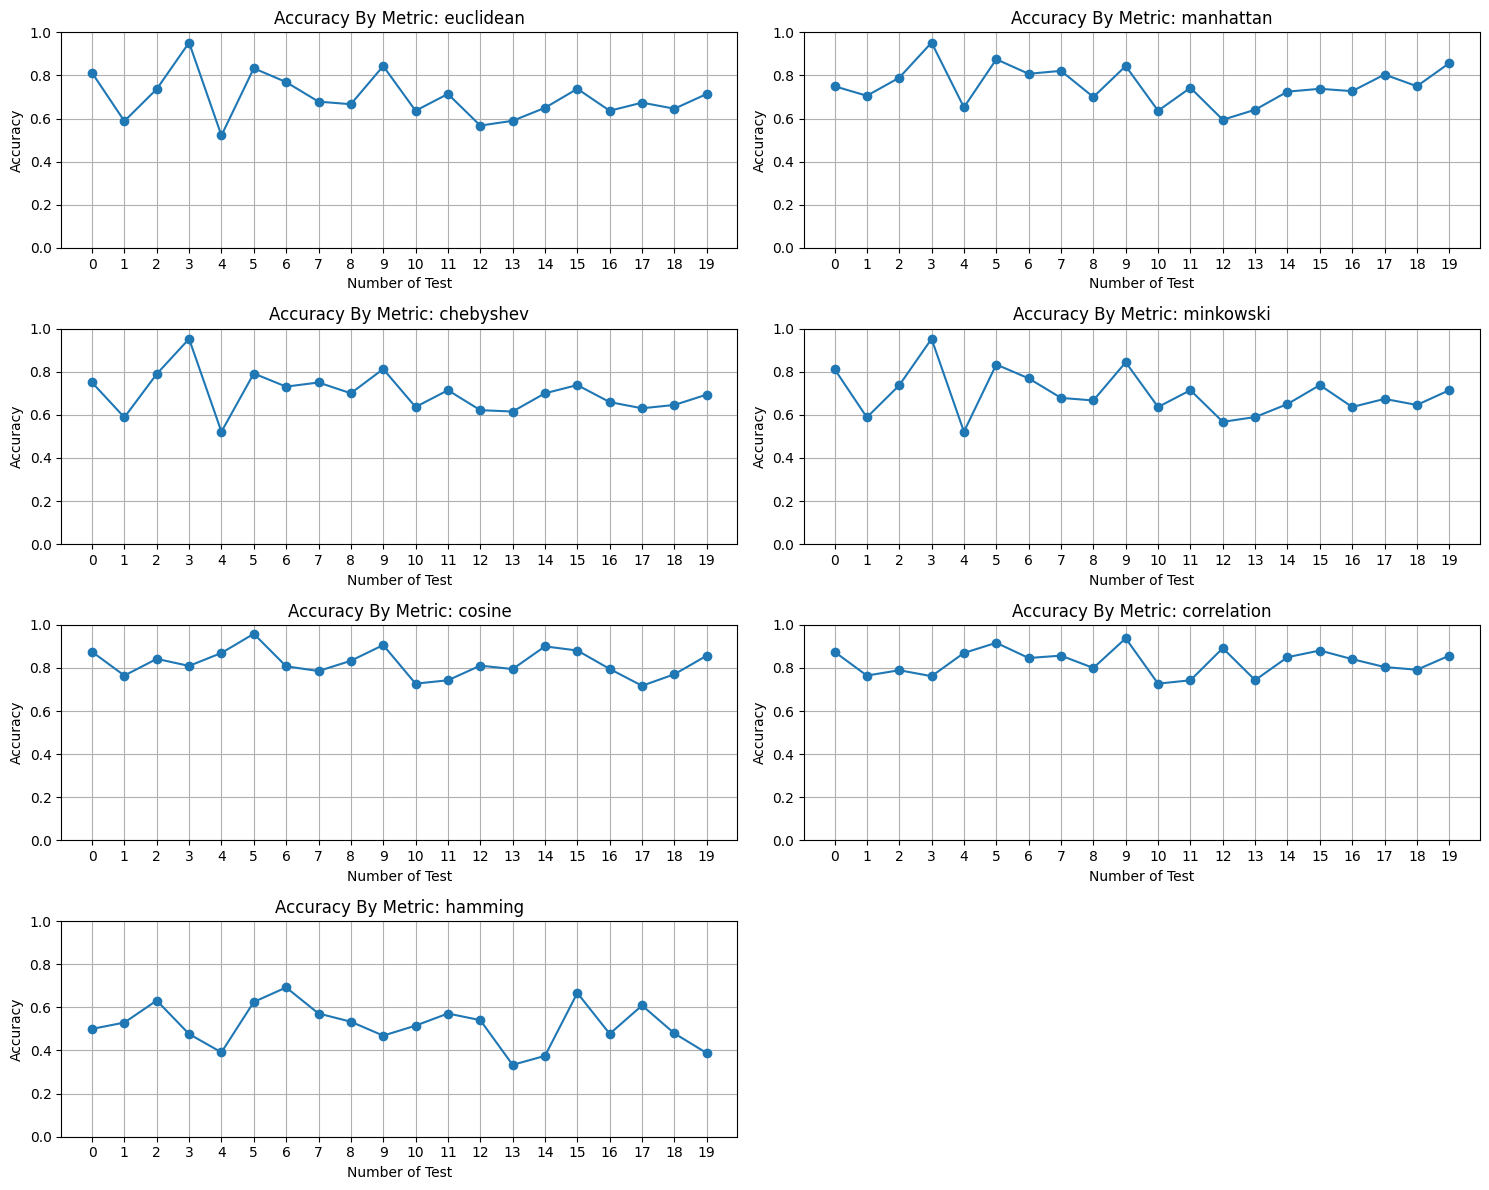

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# بارگذاری داده های شراب
wine = load_wine()

x_train_list, x_test_list, y_train_list, y_test_list = [], [], [], []
size_train = []
size_test = []
num = 20

# تقسیم داده ها برای نسبت های مختلف
for k in range(num):
    sample_train, sample_test, y_train, y_test = train_test_split(
        wine.data,
        wine.target,
        test_size=int(len(wine.target) * (k + 9) / 100)
    )
    x_train_list.append(sample_train)
    x_test_list.append(sample_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

    size_train.append(sample_train.shape[0])
    size_test.append(sample_test.shape[0])

# لیست متریک‌های مورد نظر
metrics = [
    'euclidean',  # فاصله اقلیدسی
    'manhattan',  # فاصله منهتن
    'chebyshev',  # فاصله چبیشف
    'minkowski',  # فاصله مینکوفسکی (با p=3)
    'cosine',     # فاصله کسینوسی
    'correlation',  # فاصله همبستگی
    'hamming'     # فاصله هامینگ
]

# ترسیم دقت برای هر متریک
plt.figure(figsize=(15, 12))

for idx, metric in enumerate(metrics):
    accuracies = []
    name = metric  # نام متریک همان مقدار متریک است

    # اجرای KNN با متریک فعلی
    for i in range(num):
        knn = KNeighborsClassifier(n_neighbors=3, metric=metric)  # استفاده از متریک فعلی
        knn.fit(x_train_list[i], y_train_list[i])  # آموزش مدل

        # پیش‌بینی
        y_pred = knn.predict(x_test_list[i])

        # محاسبه دقت
        accuracy = accuracy_score(y_test_list[i], y_pred)
        accuracies.append(accuracy)

    plt.subplot(4, 2, idx + 1)  # استفاده از subplot برای 7 متریک
    plt.plot(range(num), accuracies, marker='o')
    plt.title(f"Accuracy By Metric: {name}")
    plt.xlabel("Number of Test")
    plt.ylabel("Accuracy")
    plt.xticks(range(num))  # اضافه کردن برچسب‌های محوری
    plt.grid()
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()

